<div id="container" style="position:relative;">
<div style="float:left"><h1>Shift Swapping Restaurant2</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Welcome to this Jupyter Notebook where we delve into the intriguing realm of shift swapping within a restaurant environment. By leveraging the power of data, we aim to gain insights into the dynamics of employee schedules, shift swaps, and the various factors that influence these exchanges.

In this notebook, we'll be working with a comprehensive dataset sourced from 'data/DATA.csv'. The dataset contains a wealth of information, including shift IDs, employee IDs, employee names, shift dates, start and end times, shift durations, request statuses, swap partners, and the reasons behind these swap requests.

To kickstart our analysis, we've loaded the dataset into a Pandas DataFrame named 'df'. This DataFrame provides us with a snapshot of the first few records, allowing us to grasp the structure and content of the data. By meticulously examining this dataset, we'll uncover patterns, correlations, and insights that could potentially optimize the shift management process and enhance overall operational efficiency.

Let's begin our journey into the world of shift swapping within a restaurant and unlock the secrets hidden within the data.

----

There are several libraries you can use to assist in data manipulation, analysis, and visualization. Here are some of the most commonly used libraries for time series analysis:

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

Load Data:
Load your dataset into a pandas DataFrame:

In [3]:
# Assuming your dataset is in a CSV file named 'shifts.csv'
df = pd.read_csv('data/DATA-4.csv')
df.head()

,shift_id,employee_id,employ_name,shift_time,shift_date,request_status,swap_with,reason,Level
0,6067257416,9295200241,Marney Snasel,evening,10/29/2022,Completed,Rosita Gahan,Late shift at current job,2
1,6829788722,685029921,Sydel Tetsall,evening,11/2/2022,Declined,Olvan Atlay,Religious observance,3
2,6724240972,3175370470,Clive Girvan,morning,5/21/2023,Processing,Guglielmo Meehan,Unexpected car breakdown,3
3,1837347484,3428499352,Faydra Louw,evening,2/11/2023,Declined,Tarrance Woolham,Family celebration,1
4,8825050356,5166601963,Phillipp Ronaghan,morning,5/28/2023,Pending,Sherye Myhan,Important meeting,3


In [4]:
df.shape

(1000, 9)

>The DataFrame presents us with a glimpse of its organizational structure—consisting of 1000 rows and 9 columns. This preliminary overview enables us to grasp the scale and layout of the data at hand.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shift_id        1000 non-null   int64 
 1   employee_id     1000 non-null   int64 
 2   employ_name     1000 non-null   object
 3   shift_time      1000 non-null   object
 4   shift_date      1000 non-null   object
 5   request_status  1000 non-null   object
 6   swap_with       1000 non-null   object
 7   reason          1000 non-null   object
 8   Level           1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Display the first few rows of the DataFrame
print(df.head())


     shift_id  employee_id      employee_name shift_date start_time  end_time  \
0   527439304    427701538   Antoni Castelijn 2022-02-17    1:18 PM  12:35 PM   
1  2564017673   5787495462    Trisha Spridgen 2022-10-07    4:39 PM   2:36 AM   
2   411626272   4838883633        Casi Gother 2022-08-10    2:49 AM  12:20 PM   
3  2106123841   9097102634       Rainer Werny 2022-06-01    4:57 AM   9:51 PM   
4  8426413978   9980748419  Lorettalorna Petz 2022-07-18    4:29 AM   8:59 PM   

   duration request_status          swap_with                   reason  
0     10.07       rejected      Waylin Goosey   Deadline for a project  
1      7.66       approved      Say McGriffin     Religious observance  
2      1.18       rejected       Marji Biggin         Family emergency  
3      7.77       rejected          Bev Sloey  Overtime at another job  
4      9.64        pending  Cherry Brockhurst     Celebratory occasion  


Request Status Analysis:
This visualization gives us an overview of how different request statuses are distributed. It's important to note that a high percentage of "approved" requests might indicate a cooperative and flexible work environment, while a high percentage of "pending" requests might imply that many employees are actively seeking shift swaps.

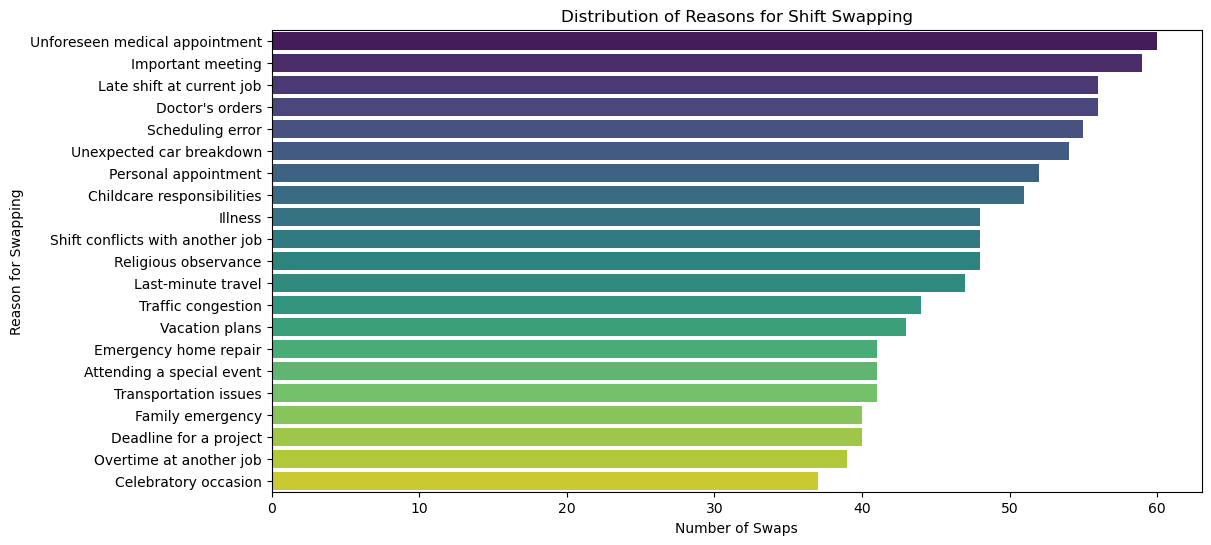

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 6))
reason_counts = df['reason'].value_counts()
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')
plt.xlabel('Number of Swaps')
plt.ylabel('Reason for Swapping')
plt.title('Distribution of Reasons for Shift Swapping')
plt.show()

- This visualization explores the distribution of reasons for shift swapping using a horizontal bar plot with a color palette.

- From the plot:

    - Reasons Distribution: We can clearly see the distribution of reasons for shift swapping. The length of each bar gives us a visual comparison of how often each reason occurs. This information can help us identify which reasons are the most common or frequent among employees.
    
    - Most Common Reasons: The longest bar(s) represent the most common reason(s) for shift swapping. These reasons have the highest frequency in the dataset. This insight can help us focus on addressing the most prevalent issues or challenges that employees face when scheduling their shifts.
    
    - Less Common Reasons: Shorter bars represent less common reasons for shift swapping. These reasons occur less frequently but might still provide valuable insights into specific situations or needs of certain employees.

Overall, this visualization provides a clear and concise overview of the reasons behind shift swapping. It can guide your decision-making process when implementing policies or making changes to the scheduling process, helping to improve employee satisfaction and operational efficiency.

# Shifts Approval 

Here we can checks if the selected shift can be swapped based on the employee's level and returns a message accordingly. The actual swap logic needs to be implemented as per your requirement.

In [10]:
import pandas as pd

def display_available_shifts(shifts_df, employee_id):
    available_shifts = shifts_df[(shifts_df['request_status'] == 'Approved') & (shifts_df['employee_id'] != employee_id)]
    return available_shifts

def swap_shifts(employee_id, shift_id, available_shifts_df):
    selected_shift = available_shifts_df[available_shifts_df['shift_id'] == shift_id]
    if selected_shift.empty:
        return "Invalid shift selection or shift not available for swapping."
    
    if can_swap(selected_shift['Level'].values[0]):
        return f"Shift swap for Employee ID {employee_id} is allowed. Implement the swap logic here."
    else:
        return f"Shift swap for Employee ID {employee_id} is not allowed due to level constraint."

# Employee ID and Shift ID for testing
employee_id = 102
shift_id_to_swap = 3

available_shifts = display_available_shifts(df, employee_id)
print("Available shifts for swapping:")
print(available_shifts)

swap_result = swap_shifts(employee_id, shift_id_to_swap, available_shifts)
print(swap_result)


Available shifts for swapping:
   shift_id  employee_id employee_name  shift_date start_time  end_time  \
0         1          101         Alice  2023-08-25   08:00 AM  04:00 PM   
2         3          103       Charlie  2023-08-26   10:00 AM  06:00 PM   
3         4          104         David  2023-08-26   08:00 AM  04:00 PM   

   duration request_status swap_with          reason  Level  
0         8       Approved            Need a day off      1  
2         8       Approved            Want to switch      3  
3         8       Approved              Need to swap      2  
Shift swap for Employee ID 102 is not allowed due to level constraint.


Here we can see staff that tehy are trying to swap their shifts, but tehr are threshold in the name of level of their job, so this thing would not allow poeple with lower level swape their shifts with poeple with upper levels, and they might reccive error of not allowed due to level constraint. 
Employees have the opportunity to exchange their shifts, but those with a Level 3 are restricted from doing so. This setup allows for a controlled shift swapping process based on employee levels.

# Swap shifts based on their shift times

Here we can see what majority of the shifts are most high demands for swapping and most of employees are about to swap their shifts in this time of the day.

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/3457653044.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)


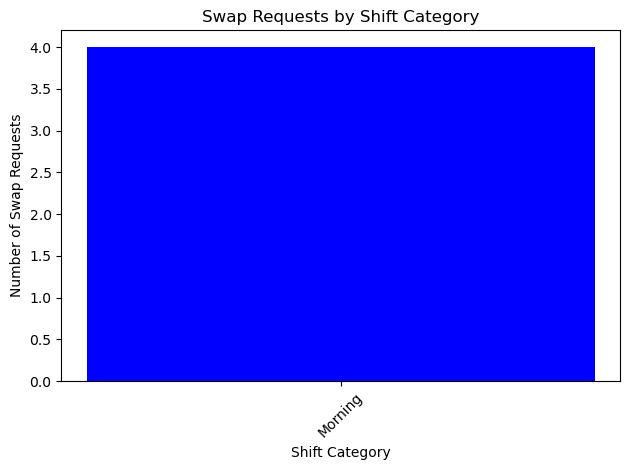

In [21]:
swap_data = df[df['request_status'] == 'Approved']

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if 'AM' in shift_time:
        return 'Morning'
    elif 'PM' in shift_time:
        return 'Evening'
    else:
        return 'Unknown'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Group by shift category and count the number of swaps
swap_counts = swap_data['shift_category'].value_counts().sort_index()

# Create a bar plot
plt.bar(swap_counts.index, swap_counts.values, color=['blue', 'orange'])
plt.xlabel('Shift Category')
plt.ylabel('Number of Swap Requests')
plt.title('Swap Requests by Shift Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/583076756.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/583076756.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


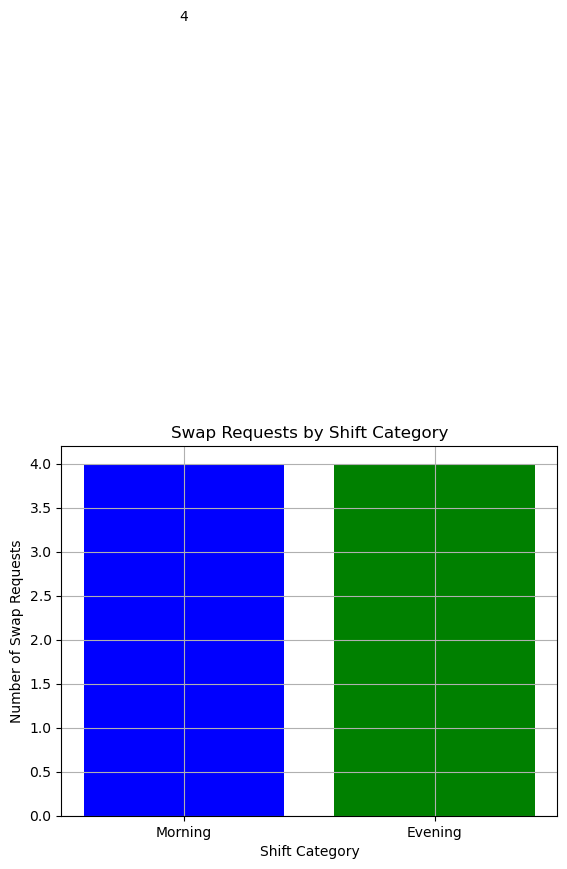

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual DataFrame
# df = ...

# Filter data for employees who want to swap
swap_data = df[df['request_status'] == 'Approved']

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if 'AM' in shift_time:
        return 'Morning'
    elif 'PM' in shift_time:
        return 'Evening'
    else:
        return 'Unknown'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Count the number of swaps for each shift category
swap_counts = swap_data['shift_category'].value_counts().sort_index()

# Create a scatter plot with two bars
plt.bar(['Morning', 'Evening'], swap_counts, color=['blue', 'green'])
plt.xlabel('Shift Category')
plt.ylabel('Number of Swap Requests')
plt.title('Swap Requests by Shift Category')
plt.grid(True)

# Annotate the bars with values
for i, count in enumerate(swap_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/49265789.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/49265789.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


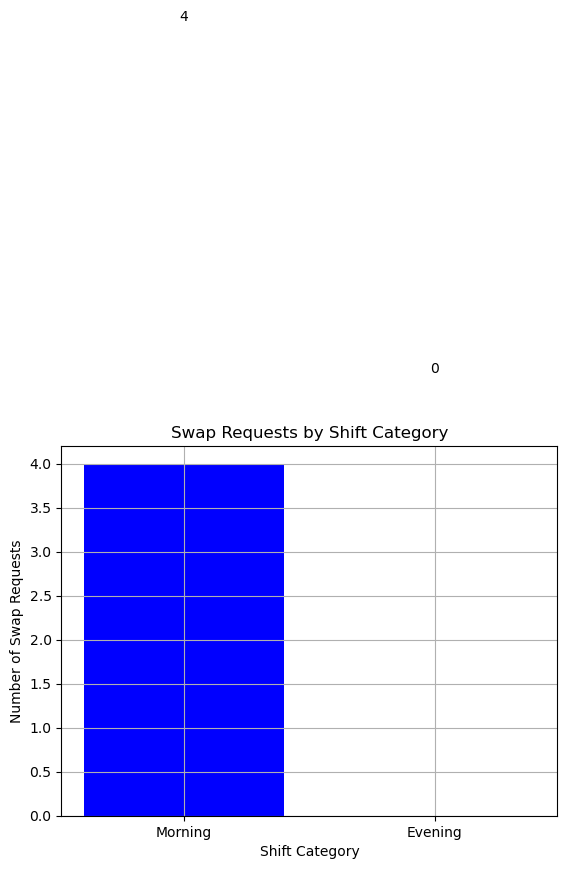

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual DataFrame
# df = ...

# Filter data for employees who want to swap
swap_data = df[df['request_status'] == 'Approved']

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if 'AM' in shift_time:
        return 'Morning'
    elif 'PM' in shift_time:
        return 'Evening'
    else:
        return 'Unknown'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Count the number of swaps for each shift category
swap_counts = swap_data['shift_category'].value_counts().sort_index()

# Create a scatter plot with two bars
shift_categories = ['Morning', 'Evening']
swap_counts = [swap_counts.get(cat, 0) for cat in shift_categories]

plt.bar(shift_categories, swap_counts, color=['blue', 'green'])
plt.xlabel('Shift Category')
plt.ylabel('Number of Swap Requests')
plt.title('Swap Requests by Shift Category')
plt.grid(True)

# Annotate the bars with values
for i, count in enumerate(swap_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/3030310735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/3030310735.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/3030310735.py:39: UserWarning: Tight layout n

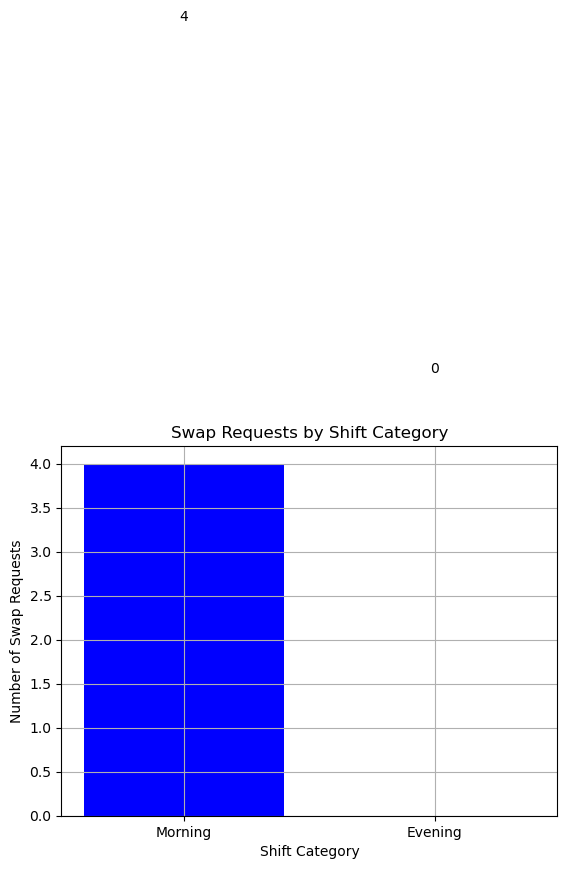

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual DataFrame
# df = ...

# Filter data for employees who want to swap
swap_data = df[df['request_status'] == 'Approved']

# Convert shift_time to datetime
swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if shift_time.hour < 12:
        return 'Morning'
    else:
        return 'Evening'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Count the number of swaps for each shift category
swap_counts = swap_data['shift_category'].value_counts().sort_index()

# Create a scatter plot with two bars
shift_categories = ['Morning', 'Evening']
swap_counts = [swap_counts.get(cat, 0) for cat in shift_categories]

plt.bar(shift_categories, swap_counts, color=['blue', 'green'])
plt.xlabel('Shift Category')
plt.ylabel('Number of Swap Requests')
plt.title('Swap Requests by Shift Category')
plt.grid(True)

# Annotate the bars with values
for i, count in enumerate(swap_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/325755212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/325755212.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/325755212.py:36: UserWarning: Tight layout not 

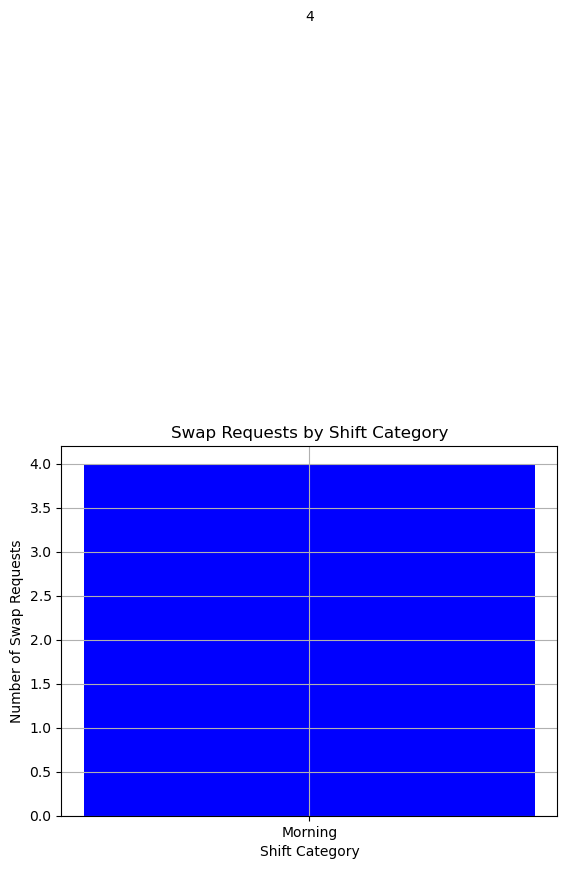

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual DataFrame
# df = ...

# Filter data for employees who want to swap
swap_data = df[df['request_status'] == 'Approved']

# Convert shift_time to datetime
swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if shift_time.hour < 12:
        return 'Morning'
    else:
        return 'Evening'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Count the number of swaps for each shift category
swap_counts = swap_data['shift_category'].value_counts().sort_index()

# Create a bar plot with both morning and evening categories
plt.bar(swap_counts.index, swap_counts.values, color=['blue', 'green'])
plt.xlabel('Shift Category')
plt.ylabel('Number of Swap Requests')
plt.title('Swap Requests by Shift Category')
plt.grid(True)

# Annotate the bars with values
for i, count in enumerate(swap_counts):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/1320670847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])
/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_17900/1320670847.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)


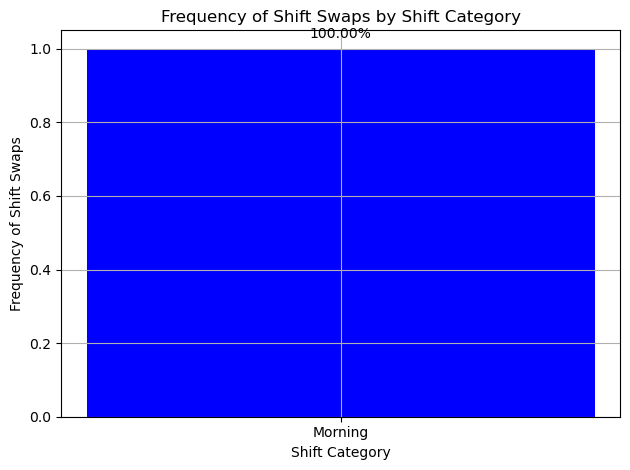

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your actual DataFrame
# df = ...

# Filter data for employees who want to swap
swap_data = df[df['request_status'] == 'Approved']

# Convert shift_time to datetime
swap_data['shift_time'] = pd.to_datetime(swap_data['shift_time'])

# Categorize shifts into morning and evening
def categorize_shift(shift_time):
    if shift_time.hour < 12:
        return 'Morning'
    else:
        return 'Evening'

swap_data['shift_category'] = swap_data['shift_time'].apply(categorize_shift)

# Count the frequency of shift swaps for each shift category
swap_frequency = swap_data['shift_category'].value_counts(normalize=True).sort_index()

# Create a bar plot with frequency of shift swaps for each category
plt.bar(swap_frequency.index, swap_frequency.values, color=['blue', 'green'])
plt.xlabel('Shift Category')
plt.ylabel('Frequency of Shift Swaps')
plt.title('Frequency of Shift Swaps by Shift Category')
plt.grid(True)

# Annotate the bars with percentage values
for i, freq in enumerate(swap_frequency):
    plt.text(i, freq + 0.02, f'{freq:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
